# Wrangle 2025

This code reformats the LTRM data to be in the format of (location, year, hydrological data, each fish species presence/absence).

For reference: [Data Dictionary](https://www.umesc.usgs.gov/cgi-bin/ltrmp/fish/fish_meta.pl)
***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

From Kristen Bouska:

Merge the ltrm fish data with the aquatic areas dataset. Did a spatial merge and did not otherwise alter the data structure. The dataset here includes all sites where daytime electrofishing was used in Pools 4, 8 and 13. Removed sites that had ‘summary’ codes as 1 or 2, which indicate gear failure or an inaccessible site.

Following the field ‘batchno’ are fields associated with Aquatic Areas I and Aquatic Areas III. The field ‘AQUA_CODE3’ indicates contiguous floodplain lakes as ‘CFL’ and has a suite of associated metrics that follow, some of which may be explanatory for lentic fish clusters.

If we want to differentiate areas in the ‘impounded area’ of a pool, the field ‘AQUA_CODE1’ indicates those as ‘CIMP.’ Alternatively, included are river mile (‘RMILE’) and a rescaled river mile metric (‘RM_rescale’) as an approach to contrast upstream and downstream portions of the reach.

In [3]:
df = pd.read_csv("ltrm_fish_D_p4813_aa1_aa3_all.csv", low_memory=False)
pd.set_option('display.max_columns', 500)
print(df.shape) # shows the number of rows and columns
df.head()

(314004, 176)


,site,barcode,fstation,sitetype,stratum,sdate,stime,fdate,ftime,pool,lcode,gear,period,rep,summary,project,effdist,effhr,effmin,pwrgoal,pwrused,volts,v_qf,amps,a_qf,pulses,p_qf,dutycyc,dc_qf,utmzone,utm_e,utm_n,gisgrid,zone15e,zone15n,gpsmeth,gpsacc,secchi,s_qf,temp,t_qf,depth,d_qf,cond,c_qf,current,cv_qf,do,do_qf,stageht,sh_qf,sveg92,vegd,eveg92,esveg92,substrt,snag,wingdyke,trib,riprap,inout,closing,flooded,othrstrc,labind,contanrs,shtcnt,totfishc,leader,pageno,rec_site,rownum,fishcode,length,tfs,grp_wdth,catch,weight,pathcode,subproj,userdef,recorder,nfsh_cnt,orphflag,batchno,OBJECTID_1,Join_Count,TARGET_FID,OBJECTID_12,AQUA_CODE_AA1,OBJECTID_12_13,Join_Count_1,TARGET_FID_1,OBJECTID_12_13_14,uniq_id,aa_num,AQUA_CODE_AA3,AQUA_DESC,pool_1,Area,Perimeter,Acres,Hectares,bath_pct,max_depth,avg_depth,sd_depth,tot_vol,area_gt50,area_gt100,area_gt200,area_gt300,avg_fetch,sdi,econ,sill,min_rm,max_rm,len_met,len_outl,pct_outl,num_outl,len_oute,pct_oute,num_oute,pct_aqveg,pct_opwat,len_terr,pct_terr,pct_chan,len_wetf,pct1wetf,pct2wetf,len_wd,wdl_p_m2,num_wd,sco_wd,psco_wd,len_revln,rev_p_m2,num_rev,pct_rev,pct_rev2,area_tpi1,pct_tpi1,area_tpi2,pct_tpi2,area_tpi3,pct_tpi3,area_tpi4,pct_tpi4,sinuosity,year_phot,FID_1,comm_TA,avg_group_,ratio,ID,uniq_id_1,avg_dept_1,avg_fetc_1,pct_chan_1,hect,Field11,FID_12,comm_TA_1,avg_group1,ratio_1,ID_1,uniq_id_12,avg_dept_2,avg_fetc_2,pct_chan_2,hect_1,RMILE,RM_rescale
0,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN,0.6,NaN,306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,NaN,1.0,12,NaN,1.0,1.0,1.0,SNGR,246.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,201.0,12.0,0,9401,6754,1,6754,702.0,CIMP,6754,1,6754,1004.0,P13_CFL_200,1004.0,CFL,Contiguous Floodplain Lake,P13,16783827.12,42663.7284,4147.374004,1678.382712,97.959928,5.91,1.05058,0.398636,17025389.0,15331033.0,8777131.885,153333.4296,32969.77506,3.067405,2.937706,23.933951,546202.7924,522.579468,528.235291,9102.141791,24285.11305,56.922154,4.0,1612.891223,3.780474,14.0,76.196592,23.803408,16765.72413,39.297372,60.702628,10094.54659,23.660723,60.209428,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2010.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,6.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,523,1.0
1,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN,0.6,NaN,306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,NaN,1.0,12,NaN,1.0,1.0,2.0,SNGR,620.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,201.0,12.0,0,9401,6755,1,6755,702.0,CIMP,6755,1,6755,1004.0,P13_CFL_200,1004.0,CFL,Contiguous Floodplain Lake,P13,16783827.12,42663.7284,4147.374004,1678.382712,97.959928,5.91,1.05058,0.398636,17025389.0,15331033.0,8777131.885,153333.4296,32969.77506,3.067405,2.937706,23.933951,546202.7924,522.579468,528.235291,9102.141791,24285.11305,56.922154,4.0,1612.891223,3.780474,14.0,76.196592,23.803408,16765.72413,39.297372,60.702628,10094.54659,23.660723,60.209428,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2010.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,6.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,523,1.0
2,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN

Filter to period 3.

In [4]:
df = df[df['period'] == 3].reset_index(drop=True)
print(df.shape)

(127928, 176)


-   Filter to keep only rows where the fishcode column is not missing. 
-   Remove unknown fish codes (those starting with 'U-') and NFSH = no fish
-   Create a new column year by converting the sdate column to datetime and extracting the year component.

In [5]:
df = df[df['fishcode'].notna()].reset_index(drop=True)
# remove fishcode NFSH and unknown fish codes (those starting with 'U-')
df = df[(~df['fishcode'].str.startswith('U-')) & (df['fishcode'] != 'NFSH')].reset_index(drop=True)
df['year'] = pd.to_datetime(df['sdate']).dt.year
print(df.shape)

(127700, 177)


Only some of the columns are relevant, so we will drop the rest. 

In [6]:
keep_cols =['utm_e', 'utm_n', 'barcode', 'year', 'sdate', 'pool', 'fishcode', 'temp', 'depth', 'current', 'do', 
              'esveg92', 'substrt', 'cond', 'snag', 'riprap', 'inout', 'flooded']
df = df[keep_cols].reset_index(drop=True)
print(df.shape)

(127700, 18)


## Missing data

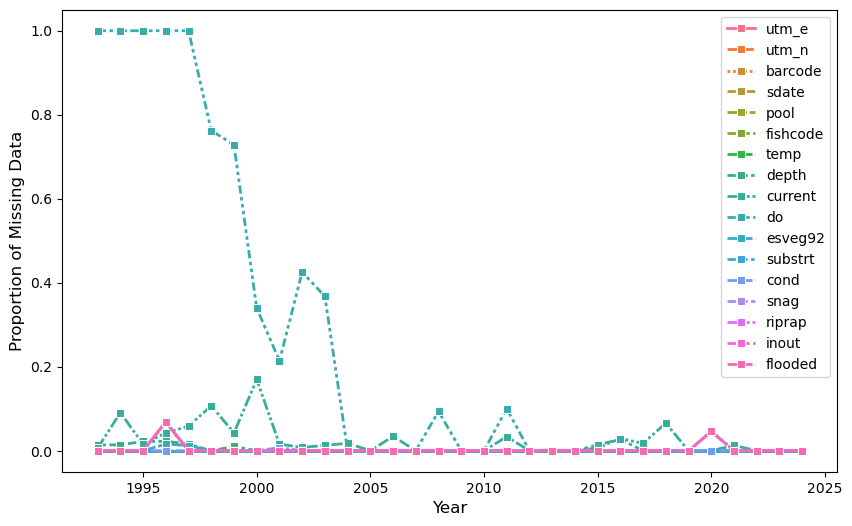

In [7]:
yearly_missing_df = df.groupby('year').apply(lambda x: x.isna().mean(), include_groups=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

Keeps only complete cases (rows with no missing data) in the selected columns

In [8]:
df = df[(df['year'] >= 2004) & (df.isna().sum(axis=1) == 0)].reset_index(drop=True)
print(df.shape) # shows the number of rows and columns
df.head()

(84572, 18)


,utm_e,utm_n,barcode,year,sdate,pool,fishcode,temp,depth,current,do,esveg92,substrt,cond,snag,riprap,inout,flooded
0,736108,4642451,13005320,2006,10/2/2006,13,LMBS,17.6,0.6,0.0,8.8,3.0,1.0,360.0,1.0,1.0,0.0,0.0
1,736108,4642451,13005320,2006,10/2/2006,13,BWFN,17.6,0.6,0.0,8.8,3.0,1.0,360.0,1.0,1.0,0.0,0.0
2,736108,4642451,13005320,2006,10/2/2006,13,BLGL,17.6,0.6,0.0,8.8,3.0,1.0,360.0,1.0,1.0,0.0,0.0
3,736108,4642451,13005320,2006,10/2/2006,13,PNSD,17.6,0.6,0.0,8.8,3.0,1.0,360.0,1.0,1.0,0.0,0.0
4,736108,4642451,13005320,2006,10/2/2006,13,LMBS,17.6,0.6,0.0,8.8,3.0,1.0,360.0,1.0,1.0,0.0,0.0


In [9]:
print(f"Number of unique barcodes= {df.barcode.unique().shape[0]}")
print(f"Numeber of unique fishcodes = {df.fishcode.unique().shape[0]}")

Number of unique barcodes= 1499
Numeber of unique fishcodes = 93


What to do with hybrid fish codes?
1. Remove them (36 observations)
2. Group them by their parent species

In [10]:
hybrid_fish = ['BCWC', 'BGLE', 'BGOS', 'BGRS', 'BGWM', 'CCGF', 'GSBG', 'GSPS', 'GSRS', 'GSWM', 'LNST', 'OSLE', 'PSBG', 'PSOS', 'PSWM', 'SBWB', 'SCBS', 'SGWE', 'SNPD', 'WPYB']  
no_hybrid = df[~df['fishcode'].isin(hybrid_fish)].reset_index(drop=True)
print("before ", df.shape)
print("hybrid removed ", no_hybrid.shape)

before  (84572, 18)
hybrid removed  (84536, 18)


In [12]:
# combine fish codes BGLE, BGOS, BGRS, BGWM into BGhybrid
bg_hybrids = ['BGLE', 'BGOS', 'BGRS', 'BGWM']
gs_hybrids = ['GSBG', 'GSPS', 'GSRS', 'GSWM']
ps_hybrids = ['PSBG', 'PSOS', 'PSWM']
other_hybrids = [h for h in hybrid_fish if h not in (bg_hybrids + gs_hybrids + ps_hybrids)]
# Create combined hybrid dataset
comb_hybrid = df.copy()

# Replace bluegill hybrids with 'BG_hybrid'
comb_hybrid['fishcode'] = comb_hybrid['fishcode'].replace(bg_hybrids, 'BG_hybrid')

# Replace green sunfish hybrids with 'GS_hybrid'
comb_hybrid['fishcode'] = comb_hybrid['fishcode'].replace(gs_hybrids, 'GS_hybrid')

# Replace pumpkinseed hybrids with 'PS_hybrid'
comb_hybrid['fishcode'] = comb_hybrid['fishcode'].replace(ps_hybrids, 'PS_hybrid')

# Remove other hybrids (those not in the three groups)
comb_hybrid = comb_hybrid[~comb_hybrid['fishcode'].isin(other_hybrids)].reset_index(drop=True)

print("Original shape:", df.shape)
print("Combined hybrids shape:", comb_hybrid.shape)
print("Unique fishcodes after combining:", comb_hybrid['fishcode'].nunique())

Original shape: (84572, 18)
Combined hybrids shape: (84569, 18)
Unique fishcodes after combining: 89


Summarize the dataset by grouping by BARCODE, then aggregating environmental and categorical variables, and finally expand fish species presence into separate columns.
-   Numerical columns (e.g., temp, depth, current, do, esveg92, cond) are summarized by their median value for each year/pool combination.
-   Categorical columns (e.g., substrt, pool) use the mode (most frequent value).
-   Presence/absence columns (e.g., snag, riprap, inout, flooded) use the maximum value, assuming binary encoding (0/1).
-   Fish codes are aggregated into a list of all fish species observed in each group.

In [13]:
#df choices....original = df, no_hybrid, comb_hybrid

agg_df = df.groupby(['barcode']).agg(
    year=('year', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    utm_e=('utm_e', 'median'),
    utm_n=('utm_n', 'median'),
    median_temp=('temp', 'median'),
    median_depth=('depth', 'median'),
    median_current=('current', 'median'),
    median_do=('do', 'median'),
    median_esveg92=('esveg92', 'median'),    
    mode_substrt=('substrt', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    median_cond=('cond', 'median'),
    snag_present=('snag', 'max'),
    riprap_present=('riprap', 'max'),
    inout_present=('inout', 'max'),
    flooded_present=('flooded', 'max'),
    mode_pool=('pool', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    fish_codes=('fishcode', lambda x: list(x)) # all fish observed on that date
).reset_index()

# Expand fish presence/absence
unique_fish = set([item for sublist in agg_df['fish_codes'] for item in sublist])
# Create only fish presence/absence columns
fish_df = pd.DataFrame({fish: agg_df['fish_codes'].apply(lambda x: fish in x) for fish in unique_fish})
agg_df = pd.concat([agg_df, fish_df], axis=1)   
agg_df.drop(columns=['fish_codes'], inplace=True)
# Add richness column
agg_df['richness'] = fish_df.sum(axis=1)
fish_df['richness'] = fish_df.sum(axis=1)

# Agglomerative  Cluster Analysis
## Outliers
Before we perform the agglomerative clustering, we removed assemblages that are considered substantial outliers. To define these outliers, we computed the pairwise distances between assemblages, and found the median distance to each other assemblage, per-assemblage. This was done for both the cosine and SPAM metrics defined earlier. The resulting distributions are provided below. 


In [14]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

fish_df.shape

(1499, 94)

To stay consistent with previous ecological analyses we will only use the Jaccard distance metric for clustering.

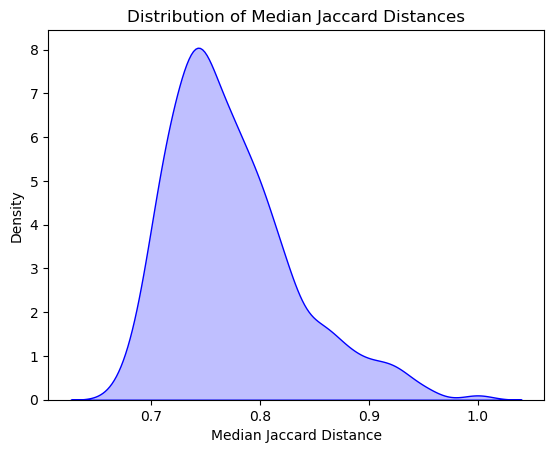

In [15]:
dist_matrix_jac = pdist(1*fish_df, metric='jaccard') 
dist_df_jac = pd.DataFrame(squareform(dist_matrix_jac))

sns.kdeplot(dist_df_jac.median(axis=0), fill=True, color="blue")
plt.xlabel("Median Jaccard Distance")
plt.ylabel("Density")
plt.title("Distribution of Median Jaccard Distances")
plt.show()

Possible outlier, but will not remove any data points.

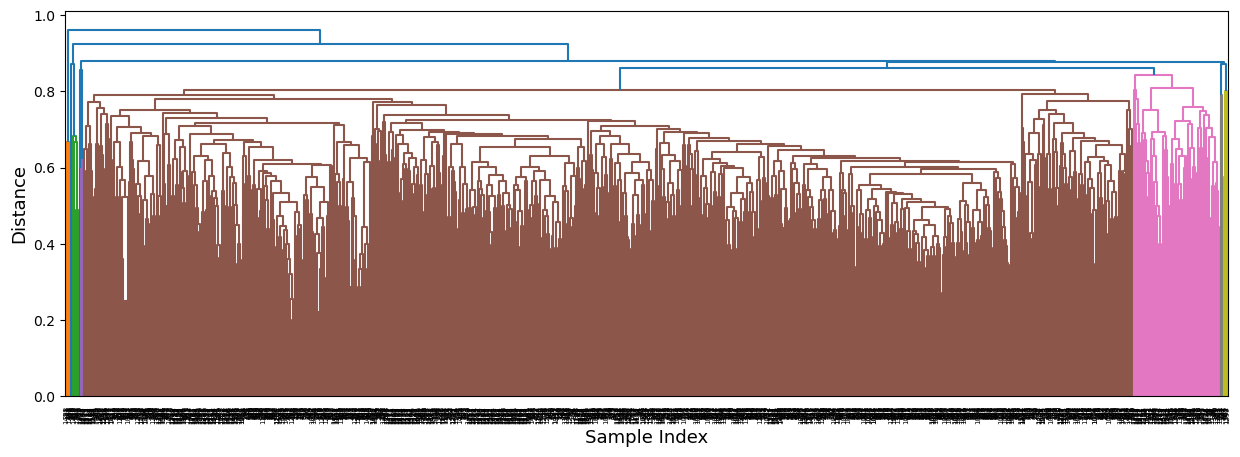

cluster
1       7
2      10
3       1
4       2
5       3
6    1355
7     111
8       4
9       6
dtype: int64


In [16]:
from scipy.cluster.hierarchy import dendrogram 

linked_jaccard = linkage(dist_matrix_jac, method='average')

cluster_threshold = 0.85
plt.figure(figsize=(15, 5))
dendrogram(linked_jaccard, color_threshold=cluster_threshold) # you can change this value to change the number of clusters you get
plt.xlabel("Sample Index", fontsize=13)
plt.ylabel("Distance", fontsize=13)
plt.show()

agg_df['cluster'] = fcluster(linked_jaccard, t=cluster_threshold, criterion='distance')
fish_df['cluster'] = agg_df['cluster']
print(agg_df.groupby('cluster').size())

In [33]:
fish_df.groupby('cluster').sum()

,CNLP,FHCF,WLYE,RESF,SPSK,NHSK,TTPH,OSSF,SVMW,BDDR,BKBH,SHDR,CARP,PSBG,SVCB,BKBF,SGWE,IODR,PNSD,MQTF,LKSG,HFCS,WDSN,BUSK,BNBH,SMBF,GDRH,BNMW,CLDR,BKCP,JYDR,LMBS,QLBK,BGWM,WTBS,YWPH,LNGR,SVLP,FWDM,SNGR,WTCP,STCT,BKSB,PDFH,STSN,GZSD,PRPH,SHRH,BWFN,PGMW,GNSF,WRMH,SHCB,BSDR,MDDR,SNSN,YLBH,SMBS,BMBF,GSPK,BHMW,RVSN,BRBT,ABLP,RVCS,GDSN,ERSN,WSDR,MMSN,SVRH,MNEY,LGPH,GSBG,RRDR,YWBS,CMMW,RVRH,FHMW,LSSR,SFSN,BLGL,NTPK,WTSK,GSOS,SBWB,BKSS,TPMT,PSWM,SGER,PDSN,CNCF,RKBS,GSPS,richness
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,3,0,0,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,3
5,2,4,47,0,0,3,0,2,0,0,0,1,58,0,2,9,0,0,1,0,1,2,0,2,0,19,3,0,0,9,0,20,3,0,34,9,10,5,45,4,2,1,0,3,5,90,0,73,0,0,4,0,0,0,0,0,0,40,14,1,6,4,0,0,2,2,61,0,11,10,5,5,0,0,1,0,1,0,0,8,17,2,3,0,1,8,0,0,27,0,27,0,0,729
6,31,70,256,1,363,15,7,117,12,7,9,21,641,9,30,46,2,4,423,2,0,17,448,5,11,75,358,19,1,507,189,1242,87,1,204,859,71,28,402,35,86,0,1,1,375,627,14,709,290,80,158,61,1,1,34,10,69,613,76,10,465,171,2,7,79,253,853,8,451,351,29,355,6,7,21,18,69,4,1,546,1212,523,44,1,0,394,50,4,315,19,227,524,11,16861
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,19
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [22]:
# Filter rows where cluster equals
cluster_num = 3
fish_df[agg_df['cluster'] == cluster_num].head()
# identify the fish species in that cluster that are TRUE
fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].drop(columns='richness')
#fish_in_cluster = fish_df[agg_df['cluster'] == cluster_num].iloc[:, len(meta_cols):-1]  # Exclude metadata columns and richness
fish_in_cluster = fish_in_cluster.drop(columns=['cluster'])
species_in_cluster = fish_in_cluster.columns[fish_in_cluster.any()].tolist()
print(f"Fish species in cluster {cluster_num}: {species_in_cluster}")

Fish species in cluster 3: ['BLGL', 'STSN', 'BKSS']


Do we want to filter clusters below a certain size?

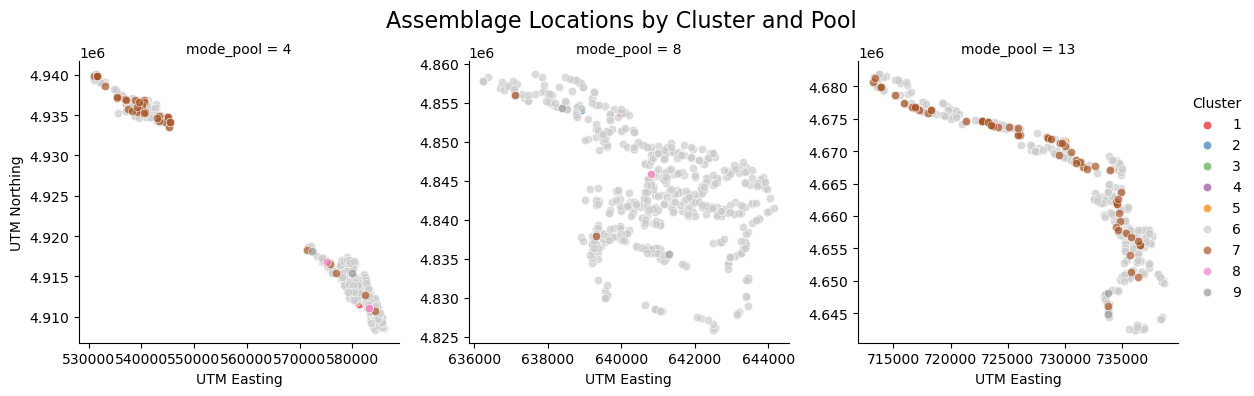

In [24]:
# Find the cluster with the largest count
cluster_sizes = agg_df['cluster'].value_counts()
largest_cluster = agg_df['cluster'].value_counts().idxmax()
unique_clusters = sorted(agg_df['cluster'].unique())
size_map = {c: f"{cluster_sizes[c]} sites" for c in unique_clusters}
palette = sns.color_palette("Set1", n_colors=len(unique_clusters))
light_color = (0.8, 0.8, 0.8)  # RGB for light gray

# Assign palette, but set largest cluster to light gray
color_map = {c: col for c, col in zip(unique_clusters, palette)}
color_map[largest_cluster] = light_color

g = sns.FacetGrid(
    agg_df,
    col="mode_pool",
    hue="cluster",
    palette=color_map,
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.scatterplot, x="utm_e", y="utm_n", alpha=0.7)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle("Assemblage Locations by Cluster and Pool", fontsize=16)
plt.show()

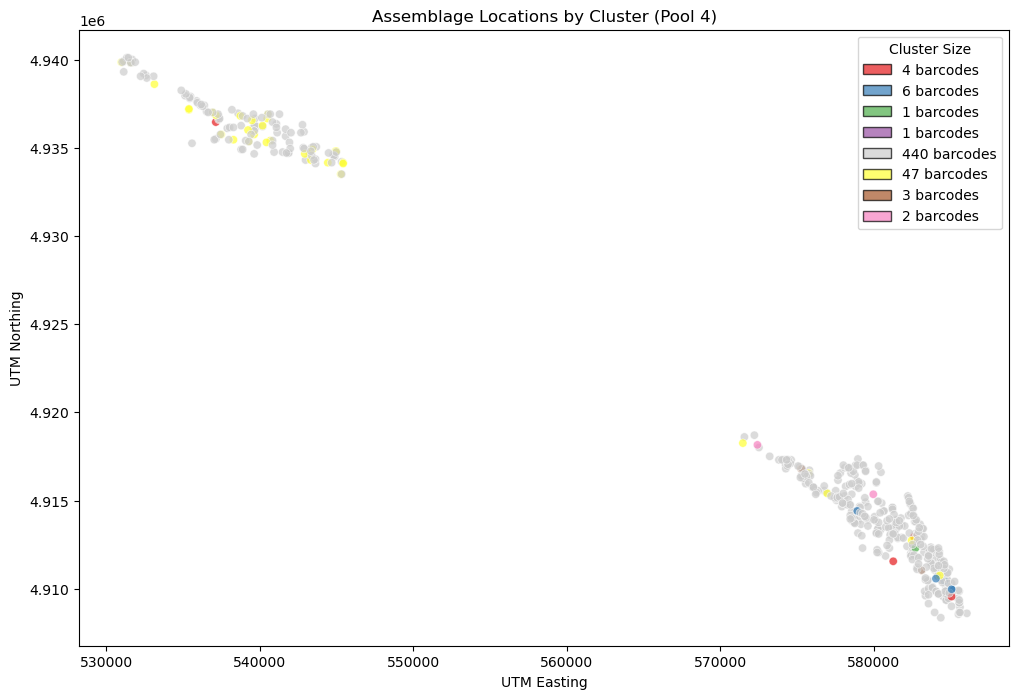

In [25]:
from matplotlib.patches import Patch

# FILTER by pool
pool_filter = 4
df_pool = agg_df[agg_df['mode_pool'] == pool_filter].copy()
df_pool['cluster'] = df_pool['cluster'].astype(str)

#  Map cluster labels to cluster sizes for legend
cluster_sizes_pool = df_pool['cluster'].value_counts()
unique_clusters_pool = sorted(df_pool['cluster'].unique())
largest_cluster_pool = df_pool['cluster'].value_counts().idxmax()
palette = sns.color_palette("Set1", n_colors=len(unique_clusters_pool))
light_color = (0.8, 0.8, 0.8)  # RGB for light gray
color_map = {c: col for c, col in zip(unique_clusters_pool, palette)}
color_map[largest_cluster_pool] = light_color
size_map = {c: f"{cluster_sizes_pool[c]} barcodes" for c in unique_clusters_pool}

# Plot with legend showing cluster size
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_pool,
    x="utm_e",
    y="utm_n",
    hue="cluster",
    palette=color_map,
    alpha=0.7
)

legend_handles = [Patch(facecolor=color_map[c], edgecolor='k', alpha=0.7) for c in unique_clusters_pool]
legend_labels = [size_map[c] for c in unique_clusters_pool]
plt.legend(handles=legend_handles, labels=legend_labels, title="Cluster Size")
plt.xlabel("UTM Easting")
plt.ylabel("UTM Northing")
plt.title(f"Assemblage Locations by Cluster (Pool {pool_filter})")
plt.show()

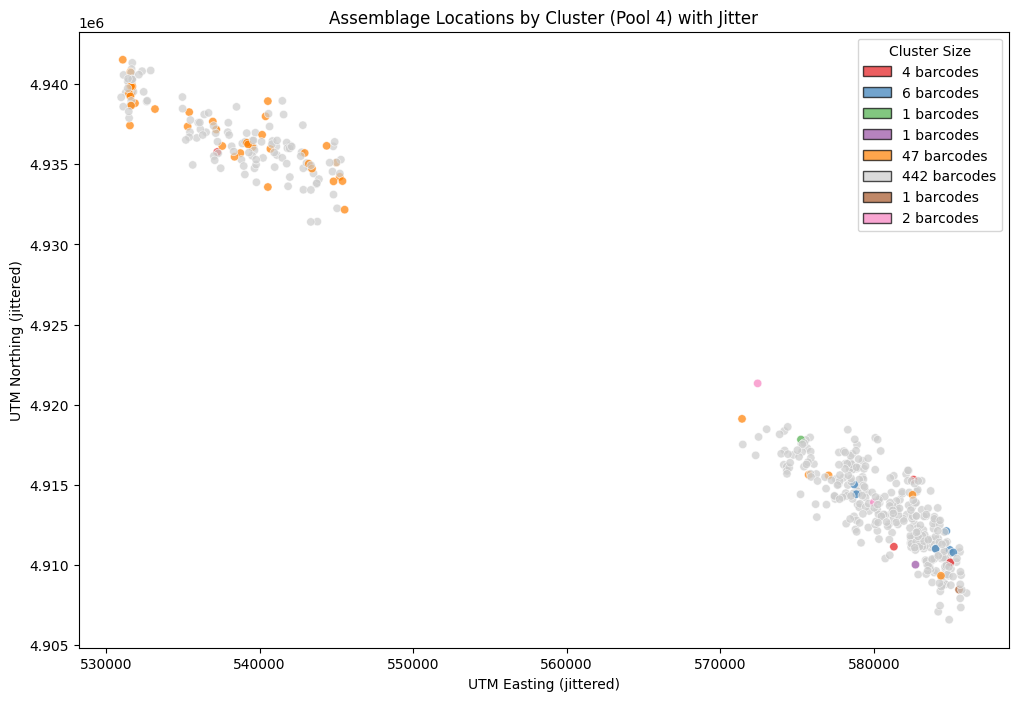

In [28]:
# Add jitter to UTM coordinates
rng = np.random.default_rng(seed=42)
jitter_scale = [100, 1000]  # Adjust as needed for your data scale
df_pool['utm_e_jitter'] = df_pool['utm_e'] + rng.normal(0, jitter_scale[0], size=len(df_pool))
df_pool['utm_n_jitter'] = df_pool['utm_n'] + rng.normal(0, jitter_scale[1], size=len(df_pool))

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_pool,
    x="utm_e_jitter",
    y="utm_n_jitter",
    hue="cluster",
    palette=color_map,
    alpha=0.7
)

# Recompute size map using string cluster labels (df_pool['cluster'] already cast to str in earlier cell)
unique_clusters_pool = sorted(df_pool['cluster'].unique())
cluster_sizes_pool = df_pool['cluster'].value_counts()
size_map_pool = {c: f"{cluster_sizes_pool[c]} barcodes" for c in cluster_sizes_pool.index}

legend_handles = [Patch(facecolor=color_map[c], edgecolor='k', alpha=0.7) for c in unique_clusters_pool]
legend_labels = [size_map_pool[c] for c in unique_clusters_pool]

plt.legend(handles=legend_handles, labels=legend_labels, title="Cluster Size")
plt.xlabel("UTM Easting (jittered)")
plt.ylabel("UTM Northing (jittered)")
plt.title(f"Assemblage Locations by Cluster (Pool {pool_filter}) with Jitter")
plt.show()

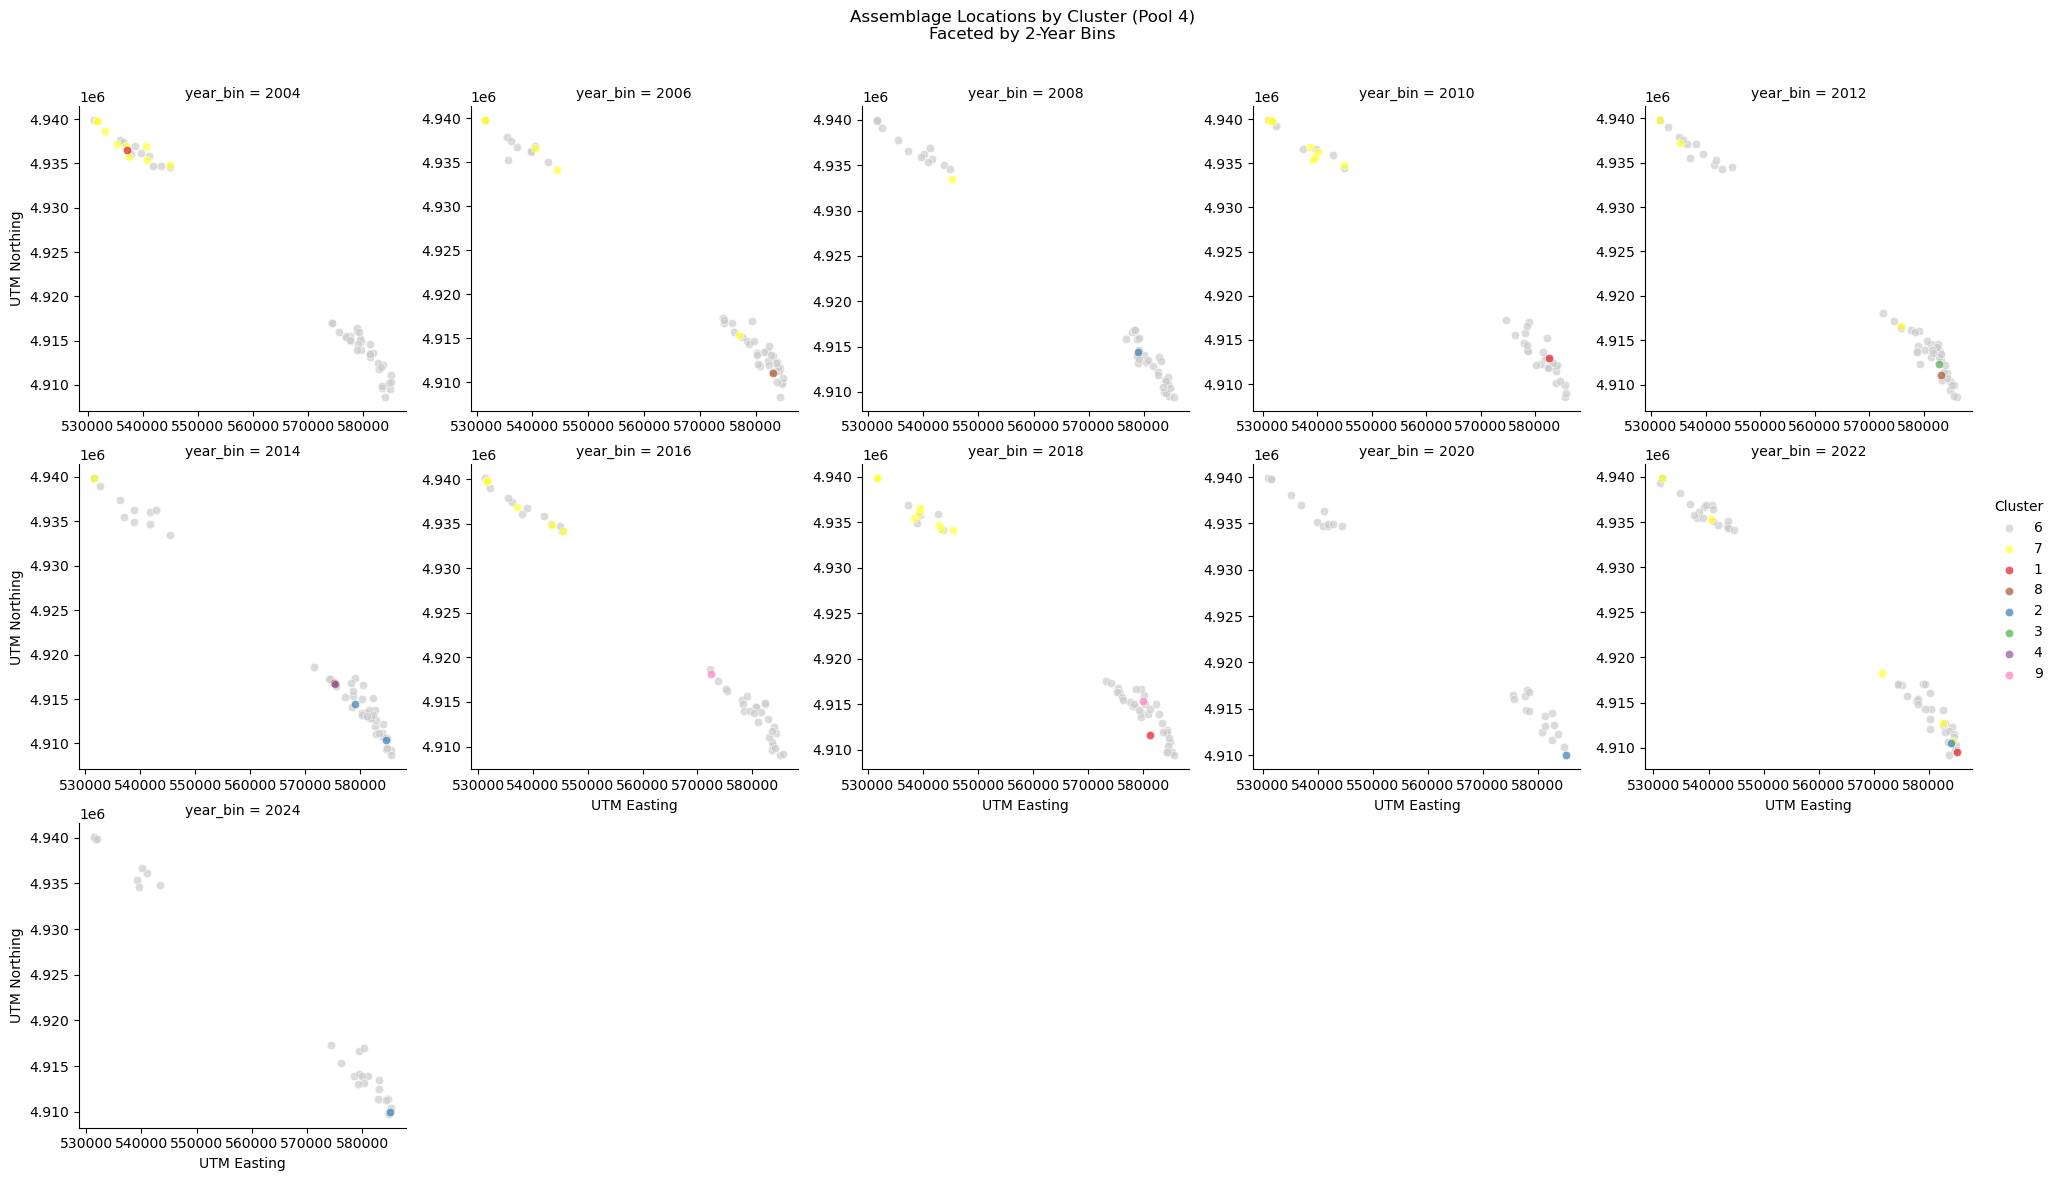

In [26]:
# Create a new column for 2-year bins
df_pool['year_bin'] = (df_pool['year'] // 2) * 2

# Create the FacetGrid
g = sns.FacetGrid(
    df_pool,
    col="year_bin",
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=False,
    hue="cluster",
    palette=color_map
)
g.map_dataframe(
    sns.scatterplot,
    x="utm_e",
    y="utm_n",
    alpha=0.7
)
g.add_legend(title="Cluster")
g.set_axis_labels("UTM Easting", "UTM Northing")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Assemblage Locations by Cluster (Pool {})\nFaceted by 2-Year Bins".format(pool_filter))
plt.show()

## Cluster Characteristics

We next inspected how each cluster varied in it’s species composition.

We will produce three vertical heatmaps for the Jaccard clustering method. Each heatmap shows the average percent presence of each fish species (rows) within each cluster (columns).

*What the graph means:*

-   **Columns**: Each column is a cluster of assemblages (sites grouped by fish community similarity).
-   **Rows**: Each row is a fish species (only those present in >10% of any cluster).
-   **Cell values**: The number in each cell is the percent of assemblages in that cluster where the species is present (0–100%).
-   **Color**: Darker blue = higher percent presence.
-   **Interpretation**: You can see which species are common or rare in each cluster, and how species composition differs between clusters and clustering methods.

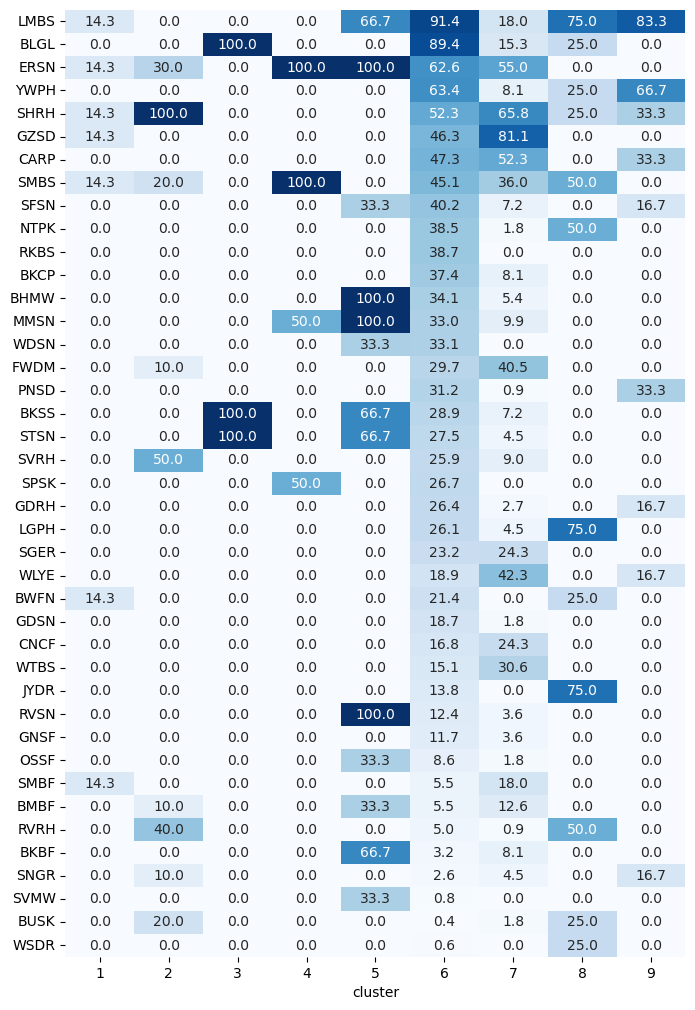

In [27]:
# Order species by overall frequency of occurrence (sum across columns)
species_cols = [c for c in fish_df.columns if c not in ['richness', 'cluster']]
species_order = fish_df[species_cols].sum(axis=0).sort_values(ascending=False).index.tolist()

# Compute percent presence per cluster using agg_df (which has 'cluster')
fish_df['cluster'] = agg_df['cluster']
jac_comp = fish_df.groupby('cluster')[species_order].mean() * 100

# Keep species present in >10% of at least one cluster
filt = jac_comp.max() > 10
jac_comp = jac_comp.loc[:, filt]

# Plot heatmap (species as rows)
plt.figure(figsize=(8, 0.3 * jac_comp.shape[1]))
sns.heatmap(jac_comp.T, cmap='Blues', annot=True, fmt=".1f", cbar=False)
plt.show()

# Hydrological EDA

For each clustering method, we can visualize how the clusters differ in terms of hydrological variables. Below are boxplots for each variable, faceted by clustering method. Each boxplot shows the distribution of the variable within each cluster.

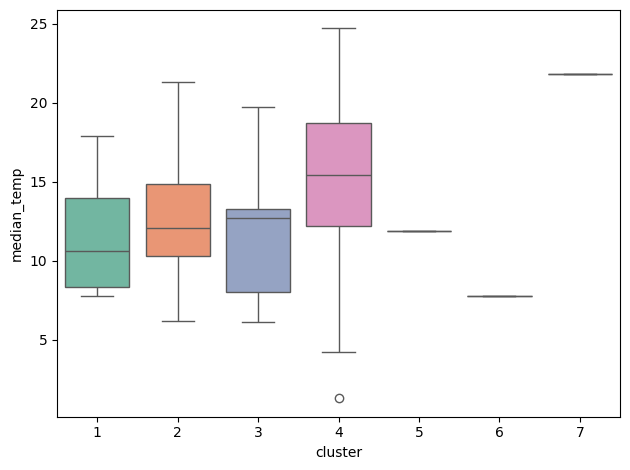

In [47]:
import matplotlib.pyplot as plt

sns.boxplot(x='cluster', y='median_temp', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

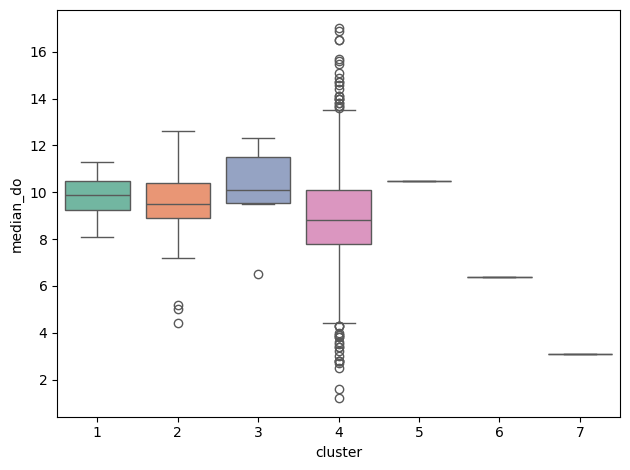

In [48]:
sns.boxplot(x='cluster', y='median_do', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

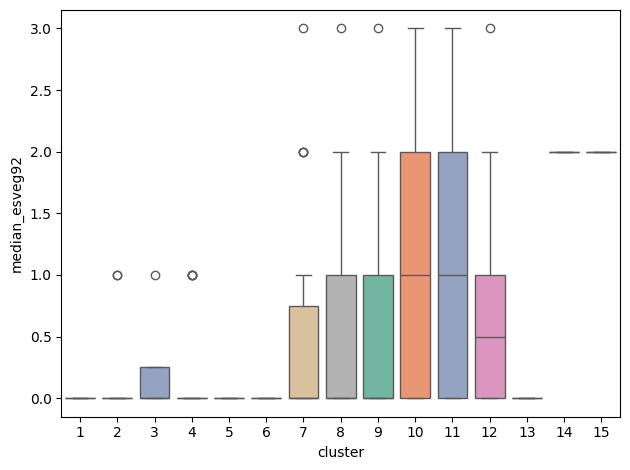

In [31]:
sns.boxplot(x='cluster', y='median_esveg92', hue='cluster', data=agg_df, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

## Decision Tree

In [32]:
agg_df.head()

,barcode,year,utm_e,utm_n,median_temp,median_depth,median_current,median_do,median_esveg92,mode_substrt,median_cond,snag_present,riprap_present,inout_present,flooded_present,mode_pool,RKBS,LGPH,BKSB,SBWB,GSPK,GSOS,CARP,PGMW,BNBH,CNLP,BSDR,LNGR,QLBK,NFSH,ERSN,BMBF,NTPK,OSSF,PRPH,RESF,LMBS,NHSK,STSN,SMBS,SNSN,WTSK,GDRH,SHCB,ABLP,GDSN,RVRH,TPMT,BHMW,PSBG,FWDM,SFSN,SVCB,MQTF,CMMW,GSPS,YWPH,CNCF,SHDR,YWBS,HFCS,WTCP,PNSD,SGWE,BUSK,RVSN,SVMW,PDFH,SGER,SNGR,GSBG,MMSN,BKSS,BDDR,BGWM,SPSK,JYDR,LKSG,GNSF,FHMW,BKBF,BKCP,GZSD,CLDR,WTBS,FHCF,RRDR,WDSN,WSDR,YLBH,WRMH,SVLP,STCT,PDSN,SVRH,LSSR,BNMW,WLYE,PSWM,TTPH,BKBH,IODR,BWFN,SMBF,BRBT,MDDR,MNEY,SHRH,BLGL,RVCS,cluster
0,11004513,2004,584880.0,4909558.0,20.7,2.0,0.19,7.3,1.0,4.0,472.0,0.0,1.0,0.0,0.0,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11
1,11004514,2004,584930.0,4911108.0,17.3,2.2,0.26,5.1,1.0,1.0,297.0,1.0,0.0,0.0,0.0,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11
2,11004515,2004,583630.0,4912208.0,20.2,0.5,0.08,7.6,2.0,3.0,317.0,1.0,0.0,0.0,0.0,4,True,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,11
3,11004517,2004,583380.0,4909608.0,20.1,1.3,0.09,6.3,3.0,3.0,474.0,0.0,0.0,0.0,0.0,4,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,11
4,11004518,2004,581180.0,4913108.0,20.0,2.8,0.12,6.1,1.0,4.0,472.0,0.0,1.0,0.0,0.0,4,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,11


In [33]:
train_features = ['median_temp', 'median_esveg92', 'mode_substrt', 'median_current']

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(agg_df[train_features], agg_df['cluster'], test_size=0.2, random_state=42, shuffle=True)

clf = DecisionTreeClassifier(max_depth = 2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [35]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


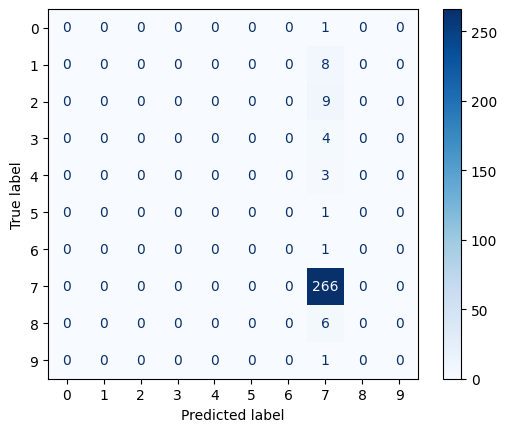

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can customize the colormap

plt.show()

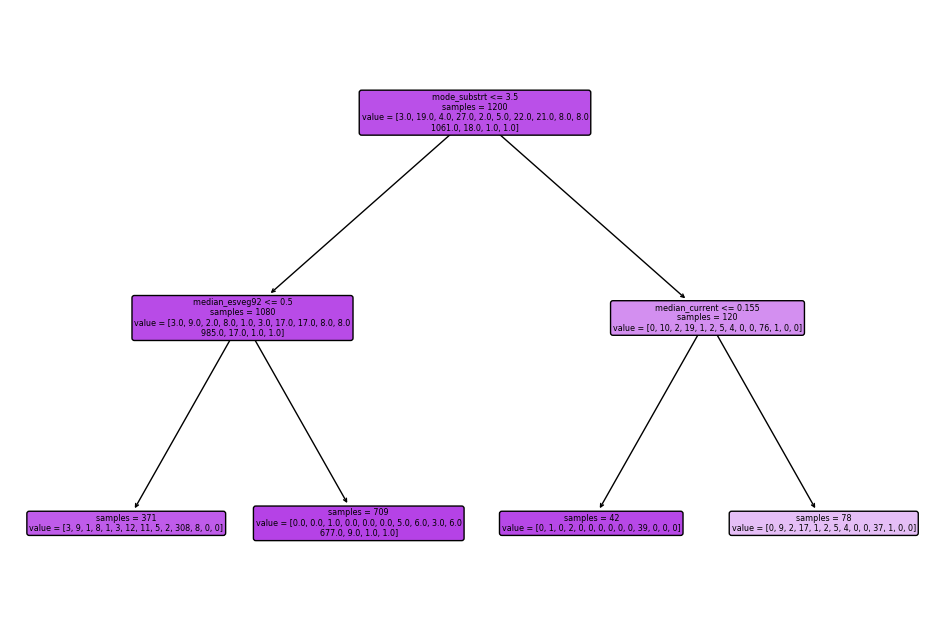

In [ ]:
from sklearn.tree import plot_tree

# Assuming `clf` is your trained DecisionTreeClassifier model
plt.figure(figsize=(12,8))  # Adjust the size to fit your tree
plot_tree(clf, filled=True, feature_names=train_features,  class_names=['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'], rounded=True, impurity=False)
plt.show()